In [57]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

# 可视化
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns

plt.figure(figsize=(12,9))
mpl.rcParams['font.sans-serif'] = ['SimHei']     # 指定默认字体
sns.set_style('whitegrid')     # darkgrid,     whitegrid,       dark,        white,      ticks


from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC,LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [58]:
train_df=pd.read_csv('./input/train.csv')
test_df=pd.read_csv('./input/test.csv')

train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [59]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [60]:
train_df.info()    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [61]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 11 columns):
PassengerId    31 non-null int64
Pclass         31 non-null int64
Name           31 non-null object
Sex            31 non-null object
Age            28 non-null float64
SibSp          31 non-null int64
Parch          31 non-null int64
Ticket         31 non-null object
Fare           31 non-null float64
Cabin          5 non-null object
Embarked       31 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 2.7+ KB


# 数据预处理

In [62]:
# inplace=True代表直接替换原来的train_df
train_df.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


In [63]:
test_df.drop(['Name','Ticket'],axis=1,inplace=True)   # 少了一列PassengerID
test_df.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,892,3,male,34.5,0,0,7.8292,NaN,Q
1,893,3,female,47.0,1,0,7.0000,NaN,S
2,894,2,male,62.0,0,0,9.6875,NaN,Q
3,895,3,male,27.0,0,0,8.6625,NaN,S
4,896,3,female,22.0,1,1,12.2875,NaN,S


In [64]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


In [65]:
train_df.info()  # Embarked       889有2个缺失值

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(3)
memory usage: 62.7+ KB


In [66]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 9 columns):
PassengerId    31 non-null int64
Pclass         31 non-null int64
Sex            31 non-null object
Age            28 non-null float64
SibSp          31 non-null int64
Parch          31 non-null int64
Fare           31 non-null float64
Cabin          5 non-null object
Embarked       31 non-null object
dtypes: float64(2), int64(4), object(3)
memory usage: 2.3+ KB


In [67]:
# 填充Embarked
train_df['Embarked']=train_df['Embarked'].fillna('S')

In [68]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    891 non-null object
dtypes: float64(2), int64(4), object(3)
memory usage: 62.7+ KB


> Seaborn Categorical plots  kind=''

```
factorplot([x, y, hue, data, row, col, ...])	Draw a categorical plot onto a FacetGrid.

boxplot([x, y, hue, data, order, hue_order, ...])	Draw a box plot to show distributions with respect to categories.

violinplot([x, y, hue, data, order, ...])	Draw a combination of boxplot and kernel density estimate.

stripplot([x, y, hue, data, order, ...])	Draw a scatterplot where one variable is categorical.

swarmplot([x, y, hue, data, order, ...])	Draw a categorical scatterplot with non-overlapping points.

pointplot([x, y, hue, data, order, ...])	Show point estimates and confidence intervals using scatter plot glyphs.

barplot([x, y, hue, data, order, hue_order, ...])	Show point estimates and confidence intervals as rectangular bars.

countplot([x, y, hue, data, order, ...])	Show the counts of observations in each categorical bin using bars.
```

# 绘图查看

In [69]:
sns.factorplot?

Signature: sns.factorplot(x=None, y=None, hue=None, data=None, row=None, col=None, col_wrap=None, estimator=<function mean at 0x00000216D5C95840>, ci=95, n_boot=1000, units=None, order=None, hue_order=None, row_order=None, col_order=None, kind='point', size=4, aspect=1, orient=None, color=None, palette=None, legend=True, legend_out=True, sharex=True, sharey=True, margin_titles=False, facet_kws=None, **kwargs)

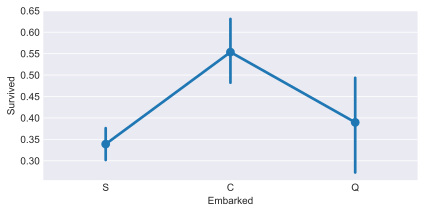

In [70]:
# 2.1 Embarked
#sns.set_style('whitegrid')     # darkgrid,     whitegrid,       dark,        white,      ticks
sns.set_style('darkgrid')
sns.factorplot(x='Embarked',y='Survived',kind='point',data=train_df,size=3,aspect=2)   # 在FacetGrid上绘制一个分类图

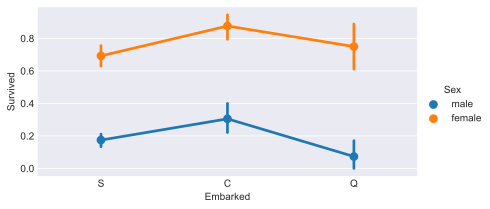

In [71]:
sns.factorplot(x='Embarked',y='Survived',hue='Sex',kind='point',data=train_df,size=3,aspect=2)

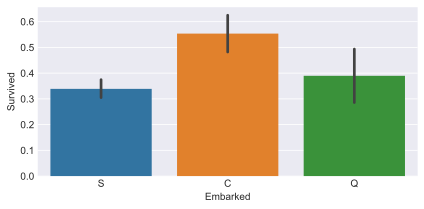

In [72]:
sns.factorplot(x='Embarked',y='Survived',data=train_df,size=3,aspect=2,kind='bar')

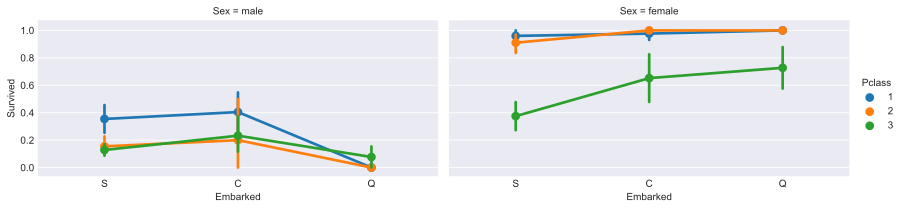

In [73]:
sns.factorplot(x='Embarked',y='Survived',data=train_df,hue='Pclass',col='Sex',size=3,aspect=2)

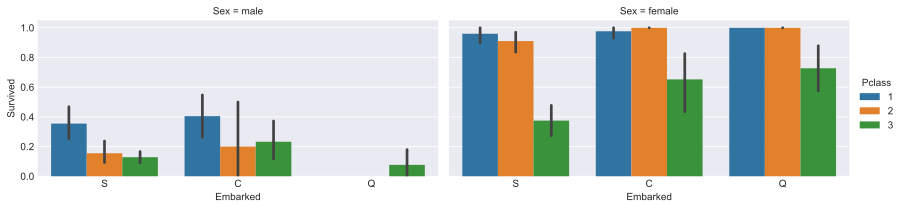

In [74]:
sns.factorplot(x='Embarked',y='Survived',data=train_df,hue='Pclass',col='Sex',size=3,aspect=2,kind='bar')

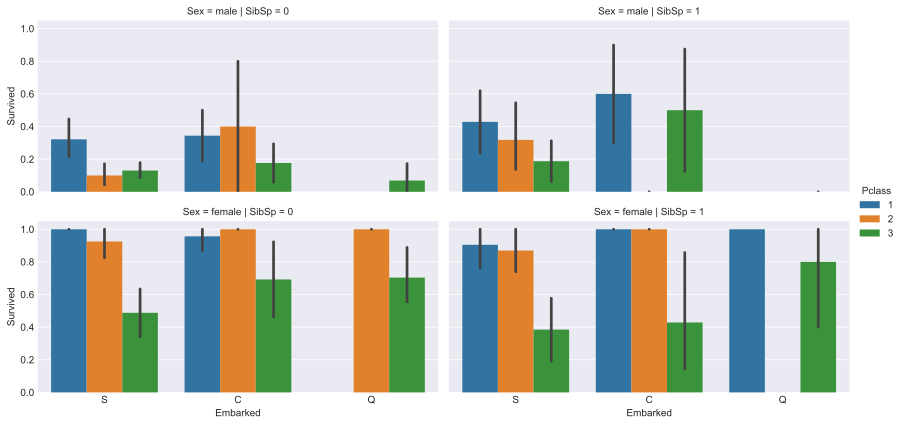

In [75]:
sns.factorplot(x='Embarked',y='Survived',data=train_df[(train_df.SibSp == 0) | (train_df.SibSp == 1)],hue='Pclass',row='Sex',col='SibSp',size=3,aspect=2,kind='bar')

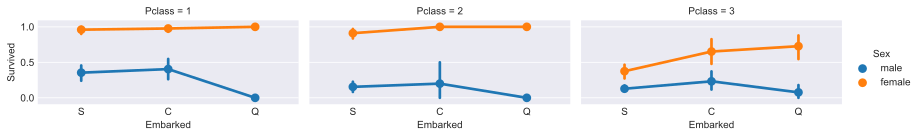

In [76]:
sns.factorplot(x='Embarked',y='Survived',data=train_df,hue='Sex',col='Pclass',size=2,aspect=2)

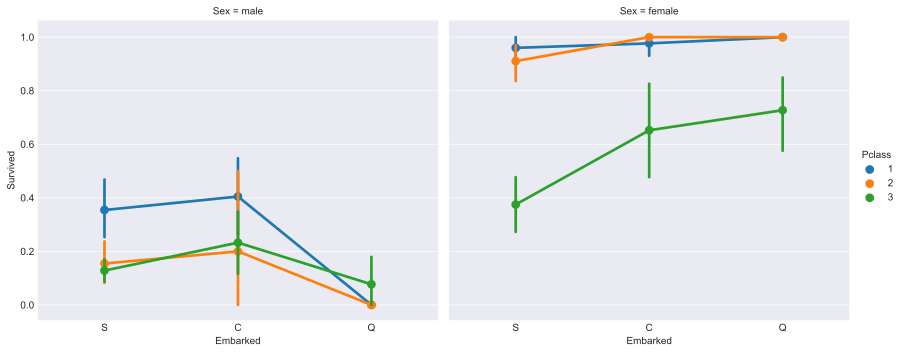

In [77]:
sns.factorplot(x='Embarked',y='Survived',data=train_df,hue='Pclass',col='Sex',size=5,aspect=1.2)

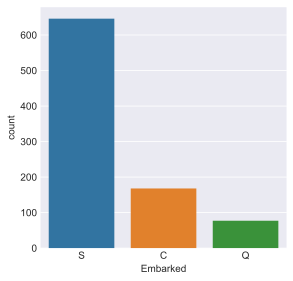

In [78]:
sns.factorplot('Embarked',data=train_df,kind='count',order=['S','C','Q'])

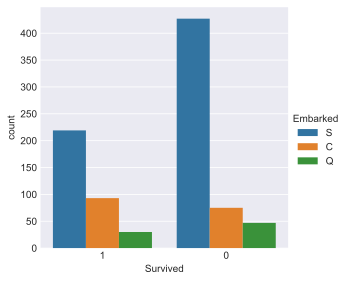

In [79]:
sns.factorplot('Survived',hue="Embarked",data=train_df,kind='count',order=[1,0])  # order增加排序功能

In [80]:
# 方法一
embark_perc = train_df[["Embarked", "Survived"]].groupby(['Embarked'],as_index=False).mean()
embark_perc

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


In [81]:
# 方法二
train_df[['Embarked','Survived']].groupby(['Embarked']).agg({'Survived':'mean'})

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.339009


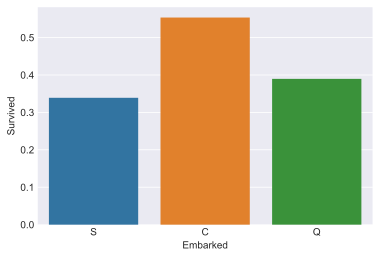

In [82]:
sns.barplot(x='Embarked', y='Survived', data=embark_perc,order=['S','C','Q'])

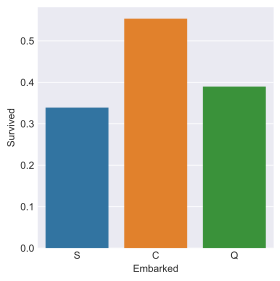

In [83]:
sns.factorplot(x='Embarked', y='Survived', data=embark_perc,kind='bar',order=['S','C','Q'])

# 一张多幅图

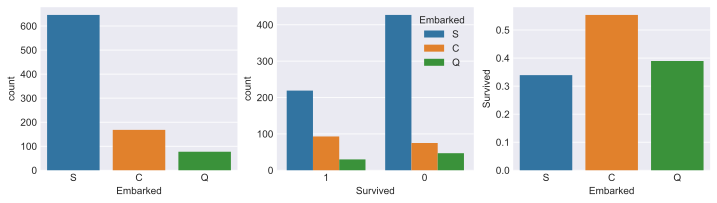

In [84]:
fig,(axis1,axis2,axis3) = plt.subplots(1,3,figsize=(12,3))

sns.countplot(x='Embarked', data=train_df, ax=axis1)

sns.countplot(x='Survived', hue="Embarked", data=train_df, order=[1,0], ax=axis2)

sns.barplot(x='Embarked', y='Survived', data=embark_perc,order=['S','C','Q'],ax=axis3)